In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

In [2]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
iris = iris[['petal_length', 'petal_width']]
iris

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [8]:
X = iris["petal_length"]
y = iris["petal_width"]

Text(0, 0.5, 'petal width')

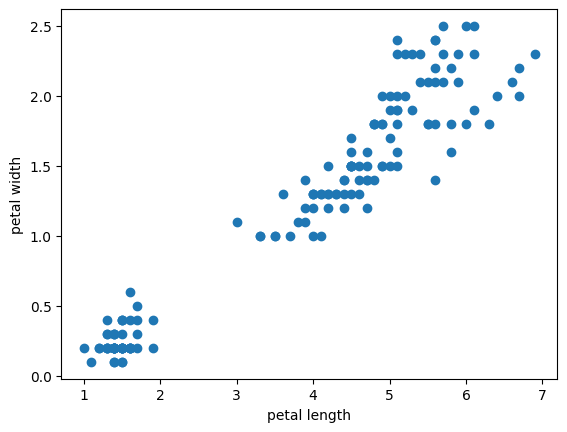

In [11]:
#აქ ვამოწმებ მაქვს თუ არა კორელაცია ჩემს ცვლადებზე, რათა შევძლო ერთ ცვლადიანი რეგრესიის მოდელის გამოყენება, ვინაიდან კორელაციის გარეშე არ გამოვა
plt.scatter(X,y)
plt.xlabel("petal length")
plt.ylabel("petal width")

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 7)
X_train

43     1.6
86     4.7
107    6.3
90     4.4
59     3.9
      ... 
142    5.1
92     4.0
103    5.6
67     4.1
25     1.6
Name: petal_length, Length: 90, dtype: float64

In [38]:
X_train = np.array(X_train).reshape(-1,1)
X_train

array([[1.6],
       [4.7],
       [6.3],
       [4.4],
       [3.9],
       [1.5],
       [6. ],
       [1.7],
       [1.2],
       [5.6],
       [5. ],
       [1.4],
       [5.8],
       [1.4],
       [4.6],
       [5.2],
       [4.6],
       [1.7],
       [4.7],
       [1.3],
       [5.2],
       [6.9],
       [3.3],
       [1.6],
       [1.4],
       [4.1],
       [5.3],
       [1.5],
       [6.4],
       [5.1],
       [4.2],
       [1.5],
       [3. ],
       [1.5],
       [6.7],
       [6.6],
       [1.2],
       [1.5],
       [5.7],
       [4. ],
       [5. ],
       [6.1],
       [3.3],
       [1.5],
       [1.3],
       [4.9],
       [1.4],
       [1.5],
       [5.1],
       [5.9],
       [5.4],
       [4.1],
       [4.4],
       [1.5],
       [5.1],
       [1.4],
       [1.3],
       [4.5],
       [4.7],
       [5.6],
       [1.5],
       [3.6],
       [4.2],
       [4.9],
       [5.5],
       [4. ],
       [5.1],
       [1.9],
       [4.7],
       [3.9],
       [1.9],
      

In [48]:
X_test = np.array(X_test).reshape(-1,1)
X_test

array([[5.1],
       [4.5],
       [1.3],
       [4.5],
       [4.5],
       [1.3],
       [4.9],
       [4.2],
       [1.6],
       [4.5],
       [5. ],
       [4.5],
       [1.5],
       [6.1],
       [1.4],
       [4.8],
       [5.8],
       [5.5],
       [1.6],
       [1.4],
       [3.9],
       [5.7],
       [4.7],
       [5. ],
       [5.8],
       [4.8],
       [4.3],
       [3.8],
       [5.1],
       [5.6],
       [4.8],
       [3.5],
       [1. ],
       [5.4],
       [4.3],
       [1.4],
       [1.3],
       [1.7],
       [1.4],
       [5.9],
       [5.7],
       [4.8],
       [5.6],
       [5.5],
       [4.2],
       [1.4],
       [4.4],
       [4. ],
       [5.3],
       [1.6],
       [1.5],
       [1.5],
       [6.7],
       [1.1],
       [6. ],
       [3.7],
       [3.5],
       [4.6],
       [1.6],
       [1.4]])

In [47]:
#აქ ვპოულობთ საუკეთესო fitting line-ს, linear_regression უკვე აქვს training parameter-ები m da c
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [40]:
c = linear_regression.intercept_
c

-0.34247378523525707

In [41]:
m = linear_regression.coef_
m

array([0.41172707])

In [45]:
y_pred_train1 = linear_regression.predict(X_train)

Text(0, 0.5, 'petal width')

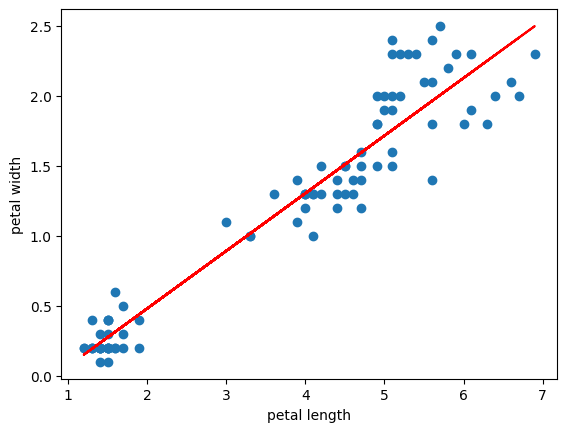

In [43]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred_train1, color="red")
plt.xlabel("petal length")
plt.ylabel("petal width")

Text(0, 0.5, 'petal width')

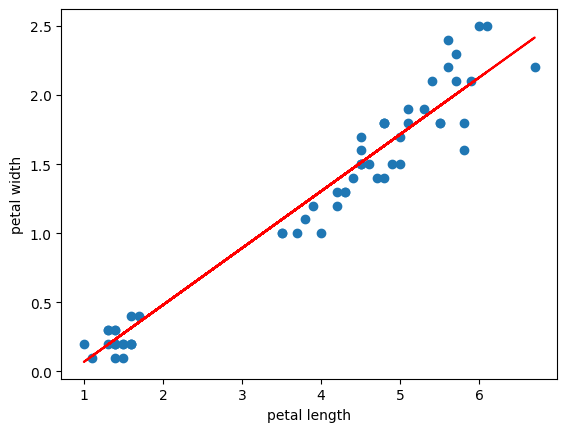

In [49]:
y_pred_test1 = linear_regression.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test1, color="red")
plt.xlabel("petal length")
plt.ylabel("petal width")

In [65]:
r2_train = r2_score(y_train, y_pred_train1)
r2_test = r2_score(y_test, y_pred_test1)
mse_train = mean_squared_error(y_train, y_pred_train1)
mse_test = mean_squared_error(y_test, y_pred_test1)

print(r2_train)
print(r2_test)
print(mse_train)
print(mse_test)

0.912525122328971
0.9495289900395009
0.05129742813981413
0.028422328667505388


In [149]:
#ამ შედეგს მაძლევს ახალ მონაცემზე
x_new = np.array([[5.2]])
y_pred_new = linear_regression.predict(x_new)

print(f"x = 5.2-ისთვის დაპროგნოზირებული y იქნება: {y_pred_new[0]}")

x = 5.2-ისთვის დაპროგნოზირებული y იქნება: 1.798506974699604


In [74]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [77]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [79]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [81]:
X = df.drop(columns="charges")
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [83]:
y = df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [84]:
linear_regression2 = LinearRegression()

In [86]:
linear_regression2.fit(X_train, y_train)

LinearRegression()

In [88]:
c = linear_regression2.intercept_
c

-12474.811300484584

In [89]:
#გვაქვს ექვსი კოეფიციენტი, ვინაიდან დასატრენინგებელი სვეტი ექვსი ცალი არის
m = linear_regression2.coef_
m

array([  253.42835136,  -173.10291884,   362.87565282,   451.85446352,
       23661.24717692,  -386.44236498])

In [90]:
#დავაპროგნოზოთ charges დასატრეინინგებელი სეტიდან
y_pred_train = linear_regression2.predict(X_train)
y_pred_train

array([ 9.08433399e+03,  4.04256700e+04,  6.93685360e+03,  1.37671076e+04,
        1.16918443e+04,  1.06384945e+04,  6.78105846e+03,  4.08008068e+03,
        3.85082401e+04,  7.95153433e+03,  7.50112519e+03,  1.00354087e+04,
        1.79172735e+03,  8.38499901e+03,  9.75893307e+03,  8.87190211e+03,
        1.42739514e+04,  3.25997032e+04,  9.33617079e+03,  1.03900531e+04,
        1.79460923e+03,  7.41579151e+03,  1.63822204e+04,  4.22721668e+03,
        3.01908147e+03,  3.18241055e+04,  3.72185926e+04,  1.31190532e+04,
        1.61968298e+04,  6.74306010e+03,  6.83459943e+03,  5.23534951e+03,
        2.63169023e+04,  4.68495683e+03,  1.20954806e+04,  3.03108306e+04,
        1.09820975e+04, -1.87615150e+03,  6.97034570e+03,  4.72777336e+03,
        5.20489428e+03,  3.13414462e+04,  1.05004883e+03,  1.22308833e+04,
        1.37524604e+04,  1.61690634e+04,  6.87071174e+03,  2.72017682e+04,
        1.45068975e+04,  1.24496697e+04,  1.50593570e+04,  9.08851993e+03,
        6.68104908e+03,  

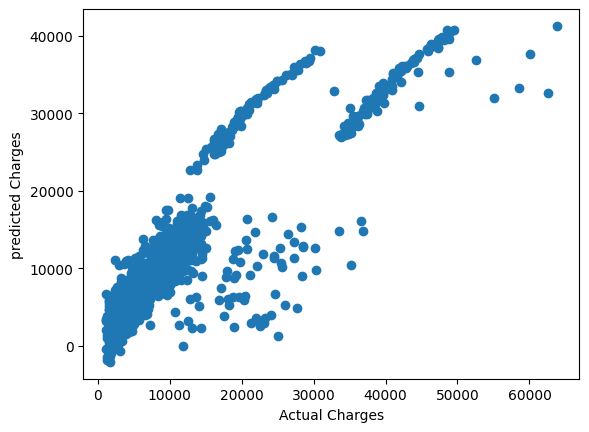

In [91]:
#ვაგებ დიაგრამას რათა ვნახო რამდენად კარგი პროგნოზი იყო, რითიც ვხედავთ რომ ზოგან კარგია ზოგან ცუდი
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Charges")
plt.ylabel("predicted Charges")
plt.show()

In [92]:
#ამით კი ვიგებ რამდენად აკურატული იყო და რადანაც ერთთან უფრო ახლოსაა ესე იგი უფრო უკეთესია ვიდრე ცუდი, შესაბამისად მოდელი მისაღებია
r2_score(y_train, y_pred_train)

0.7499858513539508

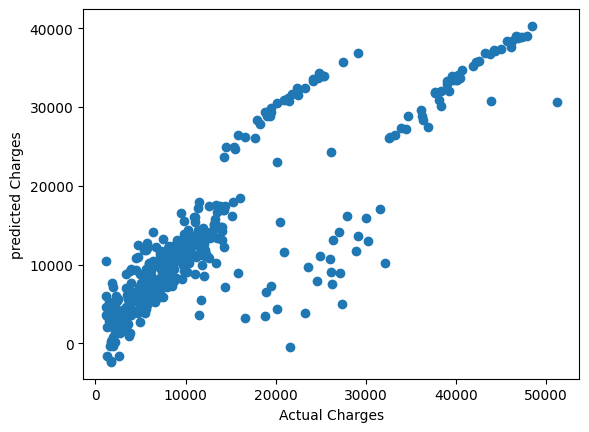

In [95]:
y_pred_test = linear_regression2.predict(X_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Charges")
plt.ylabel("predicted Charges")
plt.show()

In [97]:
#ოდნავ უფრო აკურატულია სატესტო მონაცემები
r2_score(y_test, y_pred_test)

0.7515903429011491

In [151]:
#ამ შედეგს მაძლევს ახალ მონაცემზე
x_new = np.array([[19,0,27.900,	0,1,3]])
y_pred_new = linear_regression2.predict(x_new)

print(f"ამ x-ისთვის დაპროგნოზირებული charges იქნება: {y_pred_new[0]}")

ამ x-ისთვის დაპროგნოზირებული y იქნება: 24966.47817101739


C:\Users\Temo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [98]:
df = pd.read_csv("housing_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [99]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [100]:
X = df.drop(columns =["price", "id", "date"])
y = df['price']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 7)

In [103]:
rg = DecisionTreeRegressor() 
rg.fit(X_train, y_train)

DecisionTreeRegressor()

In [107]:
y_predict = rg.predict(X_test)

In [108]:
mean_absolute_error(y_test, y_predict)

103156.89802905524

In [109]:
y_predict_train = rg.predict(X_train)
mean_absolute_error(y_train, y_predict_train)

568.140477512493

In [110]:
y_predict_train

array([920000., 999950., 880000., ..., 770000., 745000., 353000.])

In [112]:
#აქ ვხედავთ რომ ზუსტად იგივე რეზულტი მოგვცა, რაც ნიშნავს რომ overfitting მოხდა
y_train

17649    920000
9742     999950
4613     880000
19347    535000
11271    600000
          ...  
919      290000
20691    499950
5699     770000
10742    745000
16921    353000
Name: price, Length: 10806, dtype: int64

In [117]:
df = pd.read_csv("Heart.csv")
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [118]:
df.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [119]:
df = df.dropna()

In [120]:
#არასაჭირო სვეტი ამოვაგდე
df = df.drop(columns = ["Unnamed: 0"])
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [133]:
#ვაქცევ სტრინგებს რიცხვებად, ვინაიდან მანქანური სწავლებსი ალგორითმები სტრინგებს ვერ აღიქვამენ, ისინი მხოლოდ რიცხვებს აღიქვამენ
label_encoder = LabelEncoder()
df['ChestPain'] = label_encoder.fit_transform(df['ChestPain'])
df['Thal'] = label_encoder.fit_transform(df['Thal'])
df['AHD'] = label_encoder.fit_transform(df['AHD'])

In [134]:
X = df.drop(columns = "AHD")
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2


In [135]:
y = df["AHD"]
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: AHD, Length: 297, dtype: int64

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
X_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
130,54,1,1,120,258,0,2,147,0,0.4,2,0.0,2
103,71,0,1,110,265,1,2,130,0,0.0,1,1.0,1
230,52,0,1,136,196,0,2,169,0,0.1,2,0.0,1
248,52,1,0,125,212,0,0,168,0,1.0,1,2.0,2
115,41,1,2,135,203,0,0,132,0,0.0,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,52,1,0,112,230,0,0,160,0,0.0,1,1.0,1
67,54,1,1,150,232,0,2,165,0,1.6,1,0.0,2
25,50,0,1,120,219,0,0,158,0,1.6,2,0.0,1
199,59,1,3,160,273,0,2,125,0,0.0,1,0.0,1


In [126]:
X_test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
202,57,1,1,150,126,1,0,173,0,0.2,1,1.0,reversable
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal
219,59,1,0,138,271,0,2,182,0,0.0,1,0.0,normal
289,56,1,2,120,240,0,0,169,0,0.0,3,0.0,normal
126,56,0,0,200,288,1,2,133,1,4.0,3,2.0,reversable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,57,1,0,152,274,0,0,88,1,1.2,2,1.0,reversable
127,54,1,0,110,239,0,0,126,1,2.8,2,1.0,reversable
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,normal
201,64,0,0,180,325,0,0,154,1,0.0,1,0.0,normal


In [139]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.08289824,  0.69178857,  0.13224405, ...,  0.73036436,
        -0.74452916,  1.15227313],
       [ 1.72902051, -1.44552836,  0.13224405, ..., -0.93101392,
         0.33321585, -0.551445  ],
       [-0.29606516, -1.44552836,  0.13224405, ...,  0.73036436,
        -0.74452916, -0.551445  ],
       ...,
       [-0.50923207, -1.44552836,  0.13224405, ...,  0.73036436,
        -0.74452916, -0.551445  ],
       [ 0.45001904,  0.69178857,  2.23797616, ..., -0.93101392,
        -0.74452916, -0.551445  ],
       [ 0.13026867,  0.69178857, -0.92062201, ...,  0.73036436,
         0.33321585, -2.25516313]])

In [140]:
X_test_scaled

array([[ 0.23685213,  0.69178857,  0.13224405, ..., -0.93101392,
         0.33321585,  1.15227313],
       [-1.894817  ,  0.69178857,  0.13224405, ...,  2.39174264,
        -0.74452916, -0.551445  ],
       [ 0.45001904,  0.69178857, -0.92062201, ..., -0.93101392,
        -0.74452916, -0.551445  ],
       ...,
       [ 0.23685213, -1.44552836,  1.1851101 , ...,  0.73036436,
         0.33321585, -0.551445  ],
       [ 0.98293632, -1.44552836, -0.92062201, ..., -0.93101392,
        -0.74452916, -0.551445  ],
       [-0.40264861,  0.69178857,  0.13224405, ..., -0.93101392,
        -0.74452916, -0.551445  ]])

In [142]:
log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled,y_train)

In [143]:
log_reg.predict(X_train_scaled)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [144]:
log_reg.score(X_train_scaled, y_train)

0.855072463768116

In [145]:
log_reg.score(X_test_scaled, y_test)

0.8666666666666667

In [153]:
df = pd.read_csv('heart_failure_clinical_records_dataset (1).csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [154]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [155]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [156]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [160]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [161]:
dt.score(X_train, y_train)

1.0

In [162]:
dt.score(X_test, y_test)

0.7666666666666667

In [163]:
dt1 = DecisionTreeClassifier(max_depth=8)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [164]:
#აქაც დაზეპირებული შედეგი გვაქვს, ოდნავ უკეთესია წინაზე, რადგან პარამეტრი ჩავაწოდეთ, თუმცა ის მაინც არაა რაც გვინდა
print("training data score: " + str(dt1.score(X_train, y_train)))
print('test data score ' + str(dt1.score(X_test, y_test)))

training data score: 1.0
test data score 0.7833333333333333
